In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from astropy.coordinates import SkyCoord
from hips import *

In [4]:
geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="12.98 deg",
     coordsys='galactic', projection='AIT',
)

In [5]:
url = 'http://alasky.u-strasbg.fr/DSS/DSSColor/properties'
hips_survey = HipsSurveyProperties.fetch(url)

In [19]:
painter = SimpleTilePainter(geometry, hips_survey, 'jpg')
painter.run()

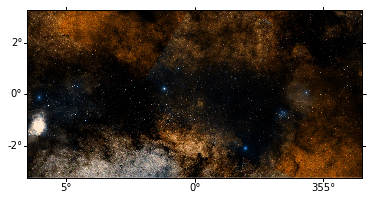

In [7]:
from astropy.visualization.mpl_normalize import simple_norm

ax = plt.subplot(projection=geometry.wcs)
norm = simple_norm(painter.image, 'asinh')
# ax.plot(coords, coords, 'r',  lw=30, transform=ax.get_transform('icrs'))
ax.imshow(painter.image, origin='lower', cmap='gray')

In [8]:
coords = [[2.29452158, 59.14978110], [10.12683778, 56.53733116], [14.1772154, 60.7167403], [21.45396446, 60.23528403], [28.59885697, 63.67010079]]
x_coords = [[2.29452158, 10.12683778], 14.1772154, 21.45396446, 28.59885697]
y_coords = [59.14978110, 56.53733116, 60.7167403, 60.23528403, 63.67010079]

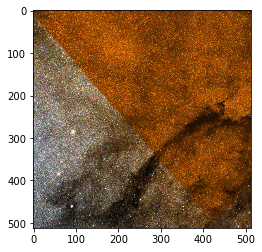

In [9]:
plt.imshow(painter.tiles[1].data)

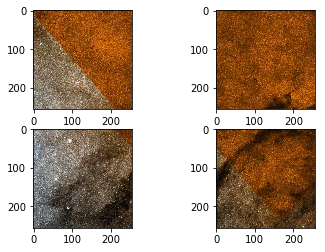

In [10]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(painter.tiles[1].children[0].data)
axarr[0,1].imshow(painter.tiles[1].children[1].data)
axarr[1,0].imshow(painter.tiles[1].children[2].data)
axarr[1,1].imshow(painter.tiles[1].children[3].data)

In [27]:
painter.tiles

[[<hips.tiles.tile.HipsTile at 0x7efc02d9add8>,

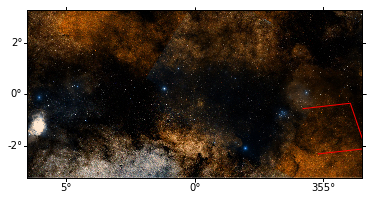

In [21]:
painter._tiles = [painter.tiles[5]]
painter.draw_tiles()
painter.plot_mpl_hips_tile_grid()

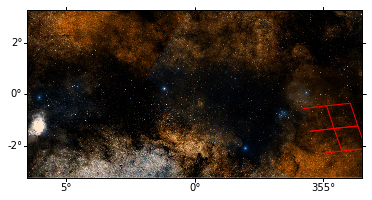

In [28]:
painter._tiles = painter.tiles[0]
painter.draw_tiles()
painter.plot_mpl_hips_tile_grid()